

1.   Load Mnist Dataset
2.   Preprocess
1.   Create Encoder Model
2.   No Activation for latent Dense layer
1.   Create Decoder
2.   Create Auto-encoder
1.   Callbacks:
    1.   Save best model
    2.   Reduce lr on plateau















In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras import backend as K
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
image_width = 32
image_height = 32
image_channels = 3

n_classes = 10
kernel_size = 3
batch_size = 32
epochs = 30
latent_dim = 256

# encoder/decoder number of filters per CNN layer
filters = [64, 128, 256]
padding = 'same'
activation= 'relu'
strides = 2

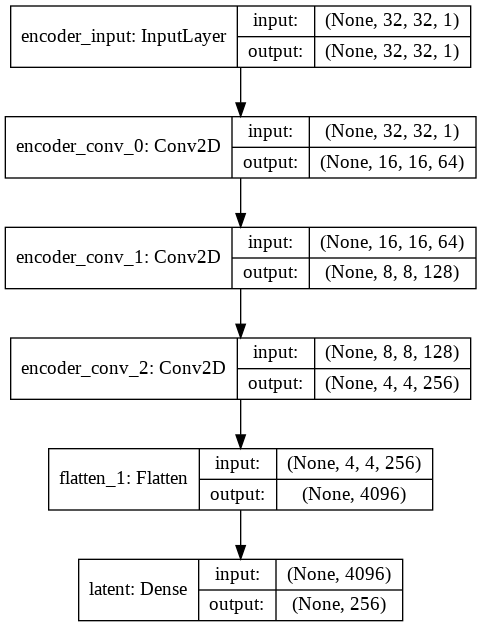

In [3]:
from IPython.display import Image
Image('encoder.png')

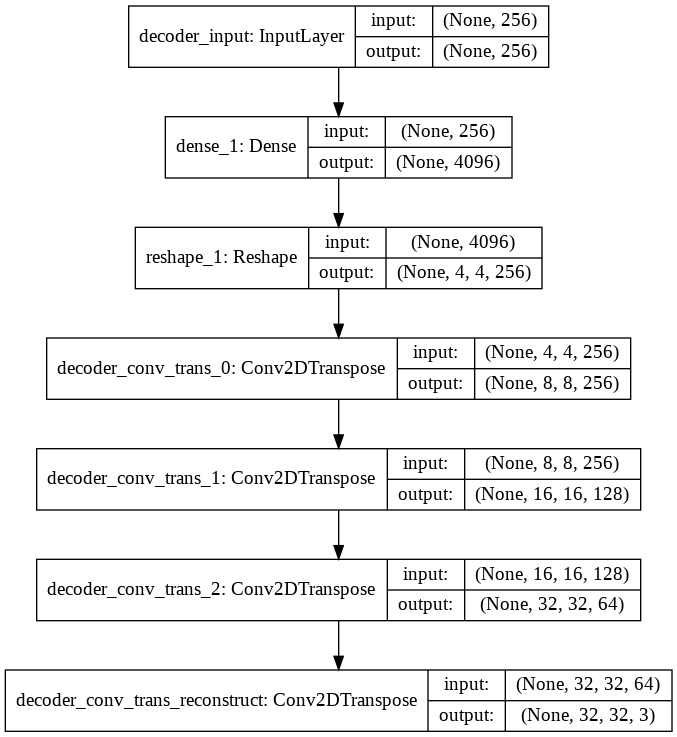

In [4]:
Image('decoder.png')

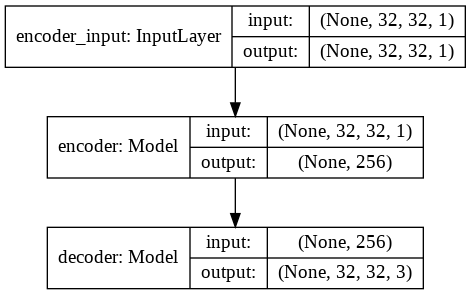

In [5]:
Image('auto-encoder.png')

In [6]:
def rgb2gray(rgb):
    gray = np.dot(rgb[...,:],[0.299, 0.587, 0.114])
    gray =  np.reshape(gray, gray.shape+ (1,))
    return gray

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)

print('x_train_gray: ', x_train_gray.shape)
print('x_test_gray: ', x_test_gray.shape)

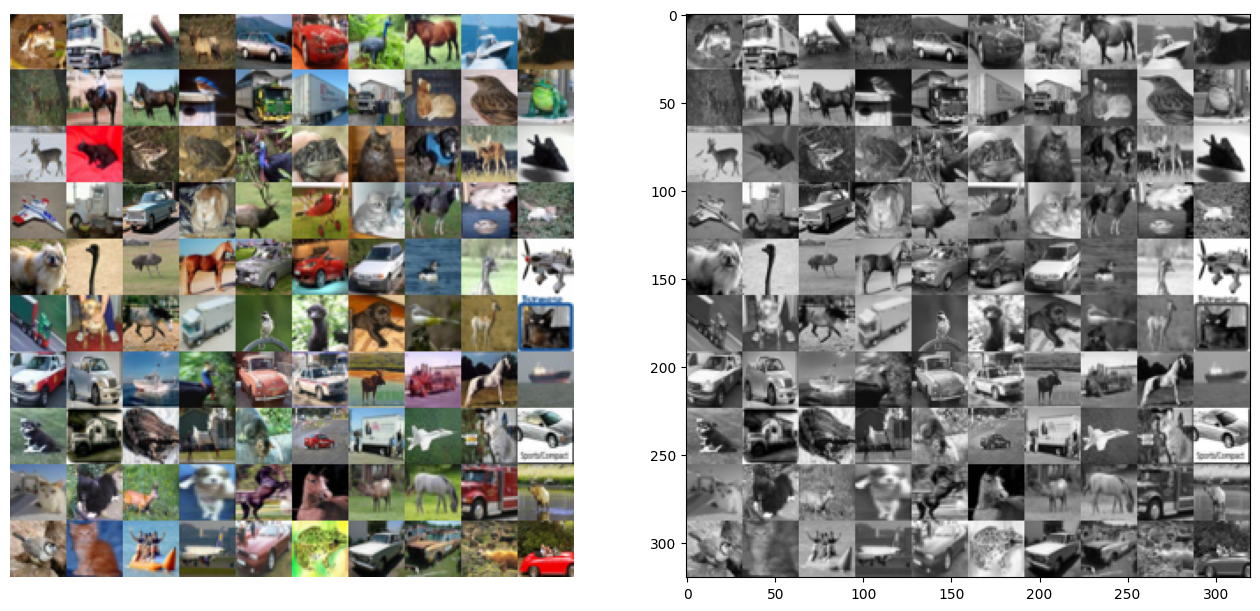

In [7]:
rows = 10
cols = 10
x_color = x_train[:rows * cols]
x_gray = x_train_gray[:rows * cols]
plt.figure(figsize=(16,8))
color = np.vstack([np.hstack(row)  for row in np.split(x_color, rows, axis=0)])
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
gray = np.vstack([np.hstack(row)  for row in np.split(x_gray, rows, axis=0)])
plt.imshow(gray.reshape((gray.shape[:-1])), cmap='gray');

In [ ]:
rows = 10
cols = 10
x_color = auto_encoder.predict(x_test_gray)[:rows * cols]
x_gray = x_test_gray[:rows * cols]
plt.figure(figsize=(16,8))
color = np.vstack([np.hstack(row)  for row in np.split(x_color, rows, axis=0)])
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(color)
plt.subplot(1,2,2)
gray = np.vstack([np.hstack(row)  for row in np.split(x_gray, rows, axis=0)])
plt.imshow(gray.reshape((gray.shape[:-1])), cmap='gray');